In [8]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

1\. **Kernel Density Estimate**

a) Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)

In [10]:
#   fill numpy array x, with variable normal distributed, with given mean and a standard deviation.
mu, sigma = 0.2, 0.5

x = npr.normal(loc=mu, scale=sigma, size=100)

x

array([ 0.91534037,  0.27194996, -0.41645976, -0.19455604,  0.51077071,
       -0.23561062,  0.438201  , -0.19134727,  0.32466452, -1.0497049 ,
        0.60581752,  0.77915935,  0.53564008,  0.20779402,  0.76555498,
        0.19036434,  0.44224323,  0.98859814,  0.12961014, -0.45312537,
       -0.22214592,  0.71222025, -0.37107668,  0.60150346,  0.37271257,
        0.40509326,  0.87459974, -0.07506713,  0.29029248, -0.52229502,
        0.25840859,  0.96853463, -1.04359491, -0.59513455,  0.84904833,
       -0.77051118, -0.38467479,  0.12591375,  0.24031743,  0.61330445,
        0.55056226,  0.54112074,  0.08420925, -0.01809152,  0.51809792,
        1.1310679 , -0.93171566,  0.73694614,  0.179605  , -0.13037974,
        0.66325795,  0.30245195, -1.57015419, -0.49449282,  0.03285131,
       -0.07645639,  0.8342728 ,  0.28122067,  1.14036288, -0.54343411,
       -0.40626719, -0.21691534, -0.0709165 ,  0.32000018,  0.15313562,
        0.24807264, -0.27821055, -0.13941179,  0.78190656,  0.64

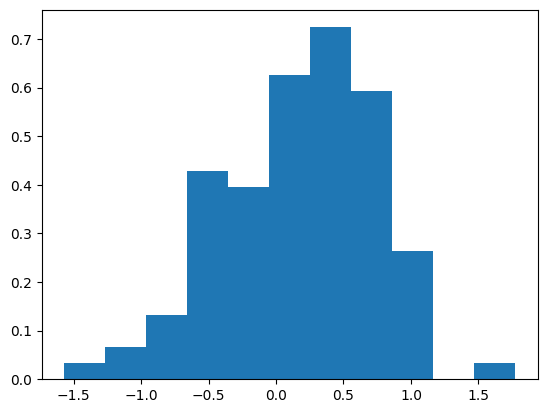

In [11]:
#   fill a histogram in pyplot


hist = plt.hist(
                x, 
                bins='auto', 
                range=None, 
                density=True, 
                weights=None, 
                cumulative=False, 
                bottom=None, 
                histtype='bar', 
                align='mid', 
                orientation='vertical', 
                rwidth=None, 
                log=False, 
                color=None, 
                label=None, 
                stacked=False,  
                data=None
                )

fig = hist
plt.show(fig)

b)
* for every element of x, create a gaussian with the mean corresponding to the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [ ]:
for i in range(len(x)):
    gaussians = []
    sig = 1.06 * x.std() * x.size**(-1/5.)
    x = npr.normal(loc=x[i], scale=sig, size=100)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

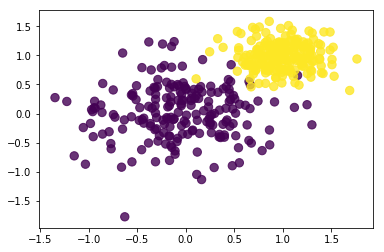

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot